# Running a CPL recipe from Python using PyEsoRex

In [1]:
from matplotlib import pyplot as plt
from astropy.visualization import PercentileInterval, ImageNormalize

plt.rcParams['figure.figsize'] = 12, 12

## Importing the Pyesorex class

In [2]:
from pyesorex.pyesorex import Pyesorex

## Creating a Pyesorex instance

If done with no arguments it will look for try to load a `pyesorex.rc` config file in the default location, `~/.pyesorex`. If there is no config file at the default path the parameters will use the default values.

In [3]:
p = Pyesorex()

[ INFO  ] Read config file '/home/ahorton/.pyesorex/pyesorex.rc'.
[ INFO  ] This is PyEsoRex, version 0.9.0.


## Inspecting the current PyEsoRex parameter values

In [4]:
print(p.parameters)

ParameterList:
    config='/home/ahorton/.pyesorex/pyesorex.rc'
    create_config='False'
    log_dir='.'
    log_file='pyesorex.log'
    log_level='info'
    msg_level='info'
    recipes=False
    recipe_config=''
    recipe_dirs='/usr/local/lib/esopipes-plugins'
    display_import_errors=False



## Creating another Pyesorex instance

An alternative config file can be specified when instantiating the Pyesorex object.

In [5]:
p = Pyesorex(config='pyesorex.rc')

[ INFO  ] Read config file '/home/ahorton/Documents/CPL/git/demos/pyesorex.rc'.
[ INFO  ] This is PyEsoRex, version 0.9.0.


In [6]:
print(p.parameters)

ParameterList:
    config='/home/ahorton/Documents/CPL/git/demos/pyesorex.rc'
    create_config='False'
    log_dir='.'
    log_file='pyesorex.log'
    log_level='debug'
    msg_level='info'
    recipes=False
    recipe_config=''
    recipe_dirs='/home/ahorton/Documents/CPL/giraffe/giraf-kit-2.16.7/giraf-2.16.7/recipes/.libs'
    display_import_errors=False



## Creating a new config file

By default `write_config()` creates a config file from the current PyEsoRex parameter values. If the file already exists it will be moved to `<filename>.bak` before the new file is created. The config path is an optional argument, if not given it will create the config file at the default location, `~/.pyesorex/pyesorex.rc`.

In [7]:
p.write_config("demo.rc")

[ INFO  ] Saving existing config as /home/ahorton/Documents/CPL/git/demos/demo.rc.bak
[ INFO  ] Wrote config file '/home/ahorton/Documents/CPL/git/demos/demo.rc'.


## Creating a new default config file

With `defaults=True` `write_config()` creates a config file using the built in default parameter values.

In [8]:
p.write_config("demo_default.rc", defaults=True)

[ INFO  ] Saving existing config as /home/ahorton/Documents/CPL/git/demos/demo_default.rc.bak
[ INFO  ] Wrote config file '/home/ahorton/Documents/CPL/git/demos/demo_default.rc'.


## Reading a config file

Config files can be read at any time.

In [9]:
p.read_config("demo.rc")

[ INFO  ] Read config file '/home/ahorton/Documents/CPL/git/demos/demo.rc'.


In [10]:
print(p.parameters)

ParameterList:
    config='/home/ahorton/Documents/CPL/git/demos/demo.rc'
    create_config='False'
    log_dir='.'
    log_file='pyesorex.log'
    log_level='debug'
    msg_level='info'
    recipes=False
    recipe_config=''
    recipe_dirs='/home/ahorton/Documents/CPL/giraffe/giraf-kit-2.16.7/giraf-2.16.7/recipes/.libs'
    display_import_errors=False



## Listing available recipes

`get_recipes()` returns a dictionary of the names of all the C and Python recipes found in the recipe directories set in `parameters['recipe_dirs']` together with some of their metadata.

`get_recipes_text()` returns a formatted string listing the names of available recipes and their synopses.

In [11]:
p.get_recipes()

{'giframestack': RecipeMetadata(name='giframestack', synopsis='Creates a stacked image from a set of raw images.', description='TBD', version='2.16.7'),
 'gimasterbias': RecipeMetadata(name='gimasterbias', synopsis='Creates a master bias image from a set of raw biases.', description='For detailed information please refer to the GIRAFFE pipeline user manual.\nIt is available at http://www.eso.org/pipelines.', version='2.16.7'),
 'gimasterdark': RecipeMetadata(name='gimasterdark', synopsis='Creates a master dark image from a set of raw dark frames.', description='For detailed information please refer to the GIRAFFE pipeline user manual.\nIt is available at http://www.eso.org/pipelines.', version='2.16.7'),
 'gimasterflat': RecipeMetadata(name='gimasterflat', synopsis='Create the fiber master flat field and the localization mask.', description='For detailed information please refer to the GIRAFFE pipeline user manual.\nIt is available at http://www.eso.org/pipelines.', version='2.16.7'),


In [12]:
print(p.get_recipes_text())

List of available recipes:

  giframestack          : Creates a stacked image from a set of raw images.
  gimasterbias          : Creates a master bias image from a set of raw biases.
  gimasterdark          : Creates a master dark image from a set of raw dark frames.
  gimasterflat          : Create the fiber master flat field and the localization mask.
  giscience             : Process a science observation.
  gistandard            : Process a spectro-photometric standard star observation and compute the instrument response curve.
  giwavecalibration     : Compute dispersion solution from an arc-lamp spectrum.



## Loading a recipe

If done with no arguments it will try to load a `<recipe_name>.rc` config file in the default location, `~/.pyesorex`. If there is no config file at the default path the parameters will use the default values.

In [13]:
p.load_recipe("gimasterdark")

[ INFO  ] Loaded recipe 'gimasterdark'.


In [14]:
print(p.recipe_parameters)

ParameterList:
    giraffe.stacking.method='median'
    giraffe.stacking.ksigma.low=5.0
    giraffe.stacking.ksigma.high=5.0
    giraffe.stacking.minmax.minimum=1
    giraffe.stacking.minmax.maximum=1
    giraffe.biasremoval.remove=True
    giraffe.biasremoval.method='PROFILE'
    giraffe.biasremoval.areas='5:40:0:4095'
    giraffe.biasremoval.sigma=2.5
    giraffe.biasremoval.iterations=5
    giraffe.biasremoval.fraction=0.8
    giraffe.biasremoval.xorder=1
    giraffe.biasremoval.yorder=1
    giraffe.biasremoval.xstep=1
    giraffe.biasremoval.ystep=1



Recipes can also be loaded by assigning to the `recipe` property, however in this case there is no option to specify a recipe config file at the same time.

In [15]:
p.recipe = "gimasterbias"

[ INFO  ] Loaded recipe 'gimasterbias'.
[ INFO  ] Read config file '/home/ahorton/.pyesorex/gimasterbias.rc'.


In [16]:
p.recipe

<cpl.ui.Recipe gimasterbias>

In [17]:
print(p.recipe_parameters)

ParameterList:
    giraffe.stacking.method='average'
    giraffe.stacking.ksigma.low=5.0
    giraffe.stacking.ksigma.high=5.0
    giraffe.stacking.minmax.minimum=1
    giraffe.stacking.minmax.maximum=1
    giraffe.masterbias.overscan.remove=False
    giraffe.masterbias.badpixel.clean=False
    giraffe.masterbias.bpm.create=True
    giraffe.masterbias.bpm.factor=5.0
    giraffe.masterbias.bpm.fraction=0.15



## Changing recipe settings

The `recipe_parameters` attribute has an `update()` method that takes a dictionary of `<parameter_name>: <new_value>` pairs.

In [18]:
p.recipe_parameters.update({"giraffe.stacking.method":"median", "giraffe.masterbias.bpm.create":False})

In [19]:
print(p.recipe_parameters)

ParameterList:
    giraffe.stacking.method='median'
    giraffe.stacking.ksigma.low=5.0
    giraffe.stacking.ksigma.high=5.0
    giraffe.stacking.minmax.minimum=1
    giraffe.stacking.minmax.maximum=1
    giraffe.masterbias.overscan.remove=False
    giraffe.masterbias.badpixel.clean=False
    giraffe.masterbias.bpm.create=False
    giraffe.masterbias.bpm.factor=5.0
    giraffe.masterbias.bpm.fraction=0.15



## Creating a recipe config file

As with PyEsoRex config files this will create a config file using the current setting, unless `defaults` is set to `True`. Again the config path is an optional argument, if not given it will create the config file at the default location, `~/.pyesorex/<recipe_name>.rc`.

In [20]:
p.write_recipe_config("gimasterbias.rc")

[ INFO  ] Saving existing config as /home/ahorton/Documents/CPL/git/demos/gimasterbias.rc.bak
[ INFO  ] Wrote config file '/home/ahorton/Documents/CPL/git/demos/gimasterbias.rc'.


In [21]:
p.write_recipe_config("gimasterbias_defaults.rc", defaults=True)

[ INFO  ] Saving existing config as /home/ahorton/Documents/CPL/git/demos/gimasterbias_defaults.rc.bak
[ INFO  ] Wrote config file '/home/ahorton/Documents/CPL/git/demos/gimasterbias_defaults.rc'.


## Reading a recipe config file

In [22]:
p.read_recipe_config("gimasterbias_defaults.rc")

[ INFO  ] Read config file '/home/ahorton/Documents/CPL/git/demos/gimasterbias_defaults.rc'.


In [23]:
print(p.recipe_parameters)

ParameterList:
    giraffe.stacking.method='average'
    giraffe.stacking.ksigma.low=5.0
    giraffe.stacking.ksigma.high=5.0
    giraffe.stacking.minmax.minimum=1
    giraffe.stacking.minmax.maximum=1
    giraffe.masterbias.overscan.remove=False
    giraffe.masterbias.badpixel.clean=False
    giraffe.masterbias.bpm.create=True
    giraffe.masterbias.bpm.factor=5.0
    giraffe.masterbias.bpm.fraction=0.15



## Setting the SOF location

The SOF file lists the paths and types of the FITS files that the recipe will process.

In [24]:
p.sof_location = '0001.gimasterbias.sof'

In [25]:
p.sof_location

'/home/ahorton/Documents/CPL/git/demos/0001.gimasterbias.sof'

## Running the recipe

In [26]:
result = p.run()

[ INFO  ] Running recipe 'gimasterbias'...
[ INFO  ] Creating master bias from 5 bias frames ...
[ INFO  ] Combination method is Average
[ INFO  ] Averaging 5 images

[ INFO  ] Writing master bias image ...
[ INFO  ] Creating bad pixel map from master bias frame ...
[ INFO  ] Using local median +/- 3.7759 [ADU] as valid pixel value range
[ INFO  ] Computing QC1 parameters ...
[ INFO  ] Processing product frame 'master_bias.fits' (MASTER_BIAS)
[ INFO  ] Recipe 'gimasterbias' complete.


## Inspecting the result

The `run()` method returns a `cpl.ui.FrameSet` object which contains the output `cpl.ui.Frame`s of the recipe. Each `Frame` contains the path to an output FITS file, and some basic metadata.

In [27]:
result

<cpl.ui.FrameSet, 2 Frames>

In [28]:
for frame in result:
    print(repr(frame))

<cpl.ui.Frame: file='/home/ahorton/Documents/CPL/git/demos/products/gimasterbias049/master_bias.fits', tag='MASTER_BIAS', group=<FrameGroup.PRODUCT: 3>, level=<FrameLevel.FINAL: 3>, type=<FrameType.IMAGE: 2>>
<cpl.ui.Frame: file='/home/ahorton/Documents/CPL/git/demos/products/gimasterbias049/bad_pixel_map.fits', tag='BAD_PIXEL_MAP', group=<FrameGroup.PRODUCT: 3>, level=<FrameLevel.FINAL: 3>, type=<FrameType.IMAGE: 2>>


### Converting the result to an HDU list

`Frame` objects can open the corresponding FITS file as an `astropy.io.fits.HDUList` object. 

In [29]:
master_bias_hdulist = result[0].as_hdulist()

In [30]:
master_bias_hdulist

In [31]:
master_bias_hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2148 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2021-10-25T23:24:26' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'ESO-VLT-U2'         / ESO Telescope Name                             
INSTRUME= 'GIRAFFE '           / Name of the Instrument.                        
OBJECT  = 'BIAS    '           / Original target.                               
MJD-OBS =      58659.4080396

In [32]:
master_bias_hdulist[0].data

array([[253.2, 250.8, 251.4, ..., 256.4, 246.6, 211.2],
       [252.2, 253.8, 250. , ..., 256. , 249. , 207.8],
       [252. , 251. , 251.2, ..., 257. , 249. , 212.2],
       ...,
       [250.4, 252.6, 254. , ..., 256.2, 247.2, 210.6],
       [251.6, 253.4, 250.6, ..., 255.4, 250.2, 210.8],
       [255.2, 254. , 250. , ..., 257.6, 249.8, 208. ]], dtype=float32)

### Converting the result to CCDData

`Frame` can also open the corresponding FITS file as an `astropy.nddata.CCDData` object.

In [33]:
master_bias = result[0].as_ccddata(unit="adu")

In [34]:
master_bias

CCDData([[253.2, 250.8, 251.4, ..., 256.4, 246.6, 211.2],
         [252.2, 253.8, 250. , ..., 256. , 249. , 207.8],
         [252. , 251. , 251.2, ..., 257. , 249. , 212.2],
         ...,
         [250.4, 252.6, 254. , ..., 256.2, 247.2, 210.6],
         [251.6, 253.4, 250.6, ..., 255.4, 250.2, 210.8],
         [255.2, 254. , 250. , ..., 257.6, 249.8, 208. ]], unit='adu')

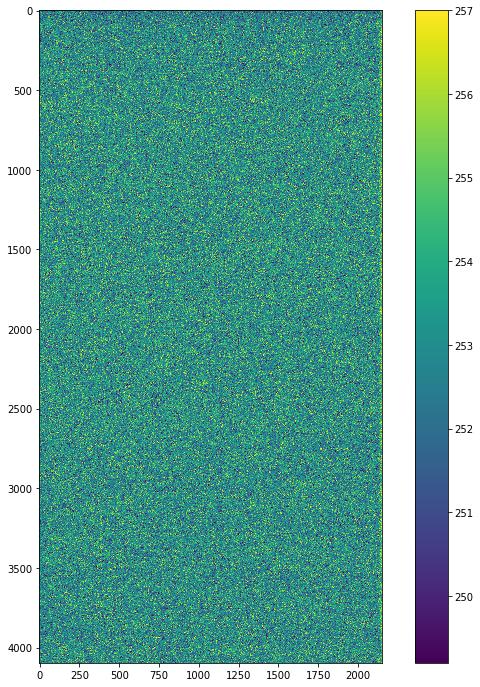

In [35]:
norm = ImageNormalize(master_bias, PercentileInterval(99.0))
plt.imshow(master_bias, norm=norm, interpolation='nearest')
plt.colorbar();